## Import Libraries

In [40]:
import sys

sys.path.append('..')
# sys.path.insert(0, '..')

In [41]:
import utils.data
import utils.trans
import utils.extract

In [42]:
from importlib import reload

In [43]:
reload(utils.data)
reload(utils.trans)
reload(utils.extract)

<module 'utils.extract' from '..\\utils\\extract.py'>

In [44]:
# import utils.record

# utils.record.run()

## Load Data

In [45]:
import librosa

In [46]:
# file_dir = "..\\..\\audio data science\\audio_datasets\\nsynth\\data_wave\\train"
# file_name = "brass_acoustic_016-083-075.wav"
# file_path = file_dir + "\\" + file_name

In [47]:
file_dir = "..\\data\\vocalis_recordings_examples\\wav"
file_name = "hm-013F15C00379D31182BAE62231EE565C.wav"
file_path = file_dir + "\\" + file_name

In [48]:
# file_path = 'record.wav'
file_path = file_name

In [49]:
file_path

'hm-013F15C00379D31182BAE62231EE565C.wav'

In [50]:
x = {}

In [51]:
x['wave'] = utils.data.load_wave(file_path)

In [52]:
x['wave'].keys()

dict_keys(['s', 't'])

In [53]:
t = x['wave']['t']
f_s = 1/(t[1]-t[0])

In [75]:
import librosa

In [83]:
def wave_to_stft(
    wave, 
    f_s, win_length, 
    hop_length, n_fft):
    
    # transform - short-time fourier:
    
    stft = librosa.stft(wave, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    stft_magnitude, stft_phase = librosa.magphase(stft)
    stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)
    
    # create axes:
    
    n_f = stft.shape[0]
    n_t = stft.shape[1]

    max_t = (len(wave)-1)/f_s
    f_stft = np.linspace(0, f_s/2, n_f)
    t_stft = np.linspace(0, max_t, n_t)
    
    # organize:
    stft = {
        's': stft_magnitude_db,
        'f': f_stft,
        't': t_stft
    }
    
    return stft


def wave_to_mel(wave, f_s, n_fft, hop_length,
                fmin, fmax, n_mels):

    mel_spec = librosa.feature.melspectrogram(
        wave, n_fft=n_fft, hop_length=hop_length,
        n_mels=n_mels, sr=f_s, fmin=fmin, fmax=fmax)

    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

    return mel_spec_db


In [84]:
mel_spec = librosa.feature.melspectrogram(
        x['wave']['s'], n_fft=n_fft, hop_length=hop_length,
        n_mels=n_mels, sr=f_s, 
        power=1.0, fmin=fmin, fmax=fmax)

In [85]:
mel_spec.shape

(384, 2939)

In [54]:
cmap_spec = 'magma'

In [55]:
x['stft'] = utils.extract.apply(x['wave']['s'], 
    func=utils.trans.wave_to_stft, 
    func_params=utils.extract.params_stft)

In [71]:
print('x' + ':')
for out_key in x.keys():
    print('--' + out_key + ':')
    for in_key in x[out_key].keys():
        print('  --' + in_key)

x:
--wave:
  --s
  --t
--stft:
  --s
  --f
  --t


In [72]:
import matplotlib.pyplot as plt
import numpy as np

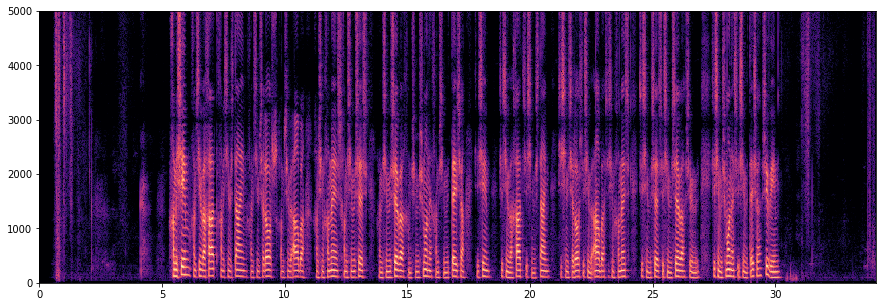

In [74]:
# plot:

# stft:
plt.figure(figsize=(15,5))
extent = np.concatenate([x['stft']['t'][[0, -1]], x['stft']['f'][[0, -1]]])
plt.imshow(x['stft']['s'], origin='lower', aspect='auto', cmap=cmap_spec, extent=extent)
plt.ylim([0, 5000])
plt.show()

## View Example

In [24]:
x_wave = x_raw['x']

In [25]:
from IPython.display import Audio

In [26]:
Audio(x_wave, rate=f_s)

#### Time Domain: Raw Waveform

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x_wave_example = x_wave
sample_rate = f_s

In [29]:
# parameters:

n_fft = 1024 # frame length

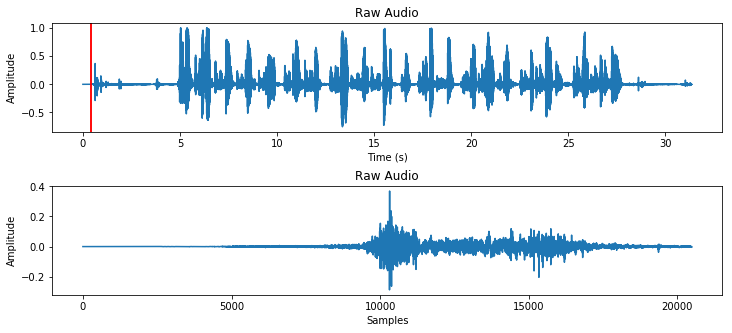

In [30]:
timesteps = np.arange(len(x_wave_example))/sample_rate

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

ax[0].plot(timesteps, x_wave_example)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio')

start = 20000
stop = start+20*n_fft
x = x_wave_example[start:stop]

ax[0].axvline(start/sample_rate, c='r') 
ax[0].axvline((start+n_fft)/sample_rate, c='r')

ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio');

#### Frequency Domain: Short-Time Fourier Transform

#### Frequency Domain: Log-Mel Spectrogram

In [33]:
# parameters:

n_fft = 4096
hop_length = 512

fmin = 0
fmax = 10000
n_mels = (6*64)

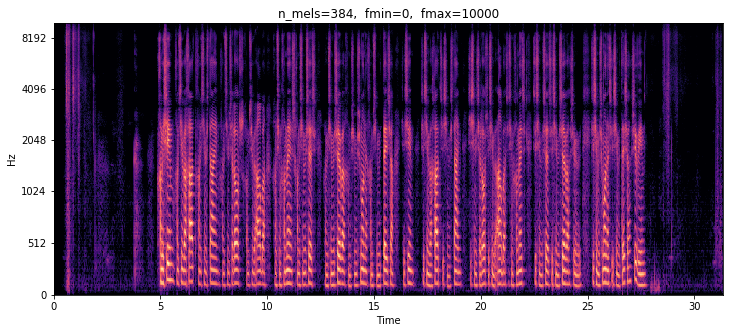

In [34]:
x_mel_example = utils.trans.wave_to_mel(x_wave_example, 
                            n_fft=n_fft, hop_length=hop_length, sample_rate=sample_rate, 
                            fmin=fmin, fmax=fmax, n_mels=n_mels, 
                            plot_flag=True)